Project 2 

Dataset: Electric Vehicle Population Data

Datasource: https://catalog.data.gov/dataset/electric-vehicle-population-data 

Data cost: Free. Classified as public government data 

Legality: Government data is legal for public use

Size of data: 210165 rows, 17 columns, 51.4 MB 

Hypotheses to explore: 
- which electric vehicles are most popular in which locations of the state
- is there a correlation between the average electric car ranges and their respective legislative districts or postal codes
- have electric cars just recently entered the state or have been there when electric cars first came out, what does the adoption look like

In [47]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from ax import optimize 

In [48]:
#loading dataset 
p = pd.read_csv('Electric_Vehicle_Population_Data.csv')

#display information about the dataset to understand structure 
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210161 non-null  object 
 2   City                                               210161 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210161 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-null  object

The dataset contains information on 210,165 electric vehicles registered in Washington state, with 17 columns describing various attributes of the vehicles and their registration

In [49]:
#data cleaning 

#viewing first few rows 
p.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,474363746,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC,5.303508e+10
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,45.0,476346482,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [50]:
#check for missing values
missing_values = p.isnull().sum()

#display columns with any missing values
missing_values[missing_values > 0]


County                    4
City                      4
Postal Code               4
Electric Range            5
Base MSRP                 5
Legislative District    445
Vehicle Location         10
Electric Utility          4
2020 Census Tract         4
dtype: int64

In [51]:
#clean up missing values 

#dropping rows with null values from minimal impact columns
columns_to_drop_na = ['County', 'City', 'Postal Code', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']
cleaned_data = p.dropna(subset=columns_to_drop_na) #https://www.w3schools.com/python/pandas/ref_df_dropna.asp 

#impute missing numeric values with the median values 
for col in numeric_columns_to_impute:
    cleaned_data.loc[:, col] = cleaned_data[col].fillna(cleaned_data[col].median())


In [52]:
#checking the data after handling missing values
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210155 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210155 non-null  object 
 1   County                                             210155 non-null  object 
 2   City                                               210155 non-null  object 
 3   State                                              210155 non-null  object 
 4   Postal Code                                        210155 non-null  float64
 5   Model Year                                         210155 non-null  int64  
 6   Make                                               210155 non-null  object 
 7   Model                                              210155 non-null  object 
 8   Electric Vehicle Type                              210155 non-null  object 
 9 

Data explorations

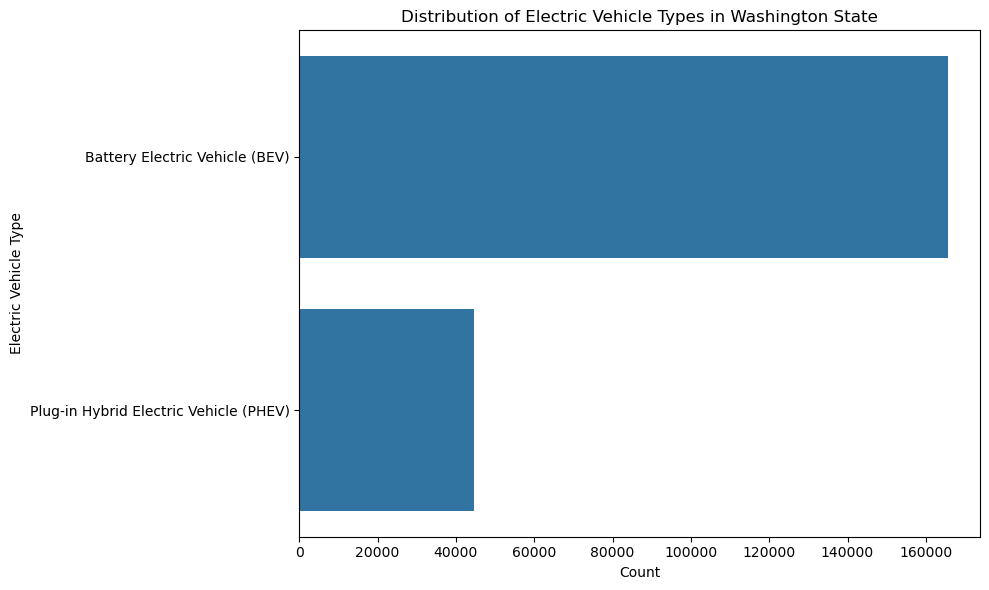

In [108]:
#visualization: Distribution of Electric Vehicle Types
plt.figure(figsize=(10, 6))
sns.countplot(
    data=cleaned_data,
    y='Electric Vehicle Type',
    order=cleaned_data['Electric Vehicle Type'].value_counts().index
)
plt.title('Distribution of Electric Vehicle Types in Washington State')
plt.xlabel('Count')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()


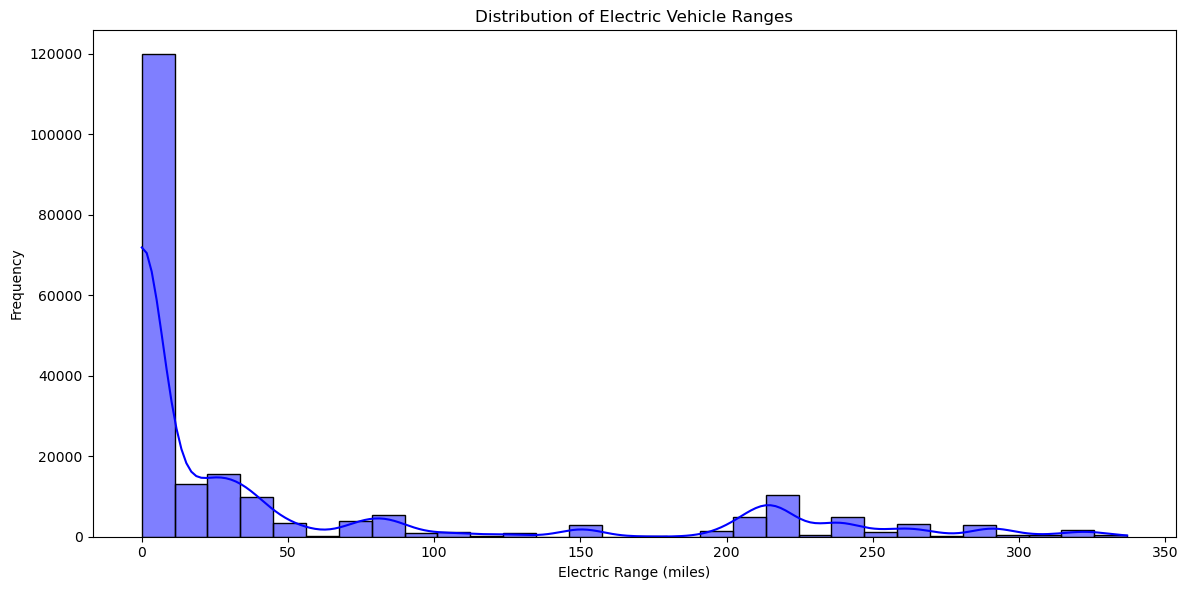

In [109]:
#visualization: Electric Range Distribution
plt.figure(figsize=(12, 6))
sns.histplot(
    data=cleaned_data,
    x='Electric Range',
    bins=30,
    kde=True,
    color='blue'
)
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Hypotheses 1: Which electric vehicles are most popular in different areas of Washington state, by county?


In [79]:
#analyzing the most popular electric vehicles by county
vehicle_popularity = (
    cleaned_data.groupby(['County', 'Make', 'Model'])
    .size()
    .reset_index(name='Count')
    .sort_values(by=['County', 'Count'], ascending=[True, False])
)

#extracting the top vehicle for each county
top_vehicles_by_county = vehicle_popularity.groupby('County').first().reset_index() 
#https://www.w3schools.com/python/pandas/ref_df_reset_index.asp 

#display the results to the user
print("Top Electric Vehicles by County in Washington State")
print(top_vehicles_by_county)

Top Electric Vehicles by County in Washington State
         County       Make     Model  Count
0           Ada      TESLA   MODEL 3      2
1         Adams      TESLA   MODEL 3     14
2       Alameda      TESLA   MODEL 3      2
3     Albemarle  CHEVROLET  BOLT EUV      1
4    Alexandria        KIA      NIRO      1
..          ...        ...       ...    ...
198  Williamson      TESLA   MODEL 3      1
199      Yakima      TESLA   MODEL 3    247
200        Yolo    HYUNDAI   IONIQ 5      1
201        York      TESLA   MODEL 3      1
202        Yuba      TESLA   MODEL 3      1

[203 rows x 4 columns]


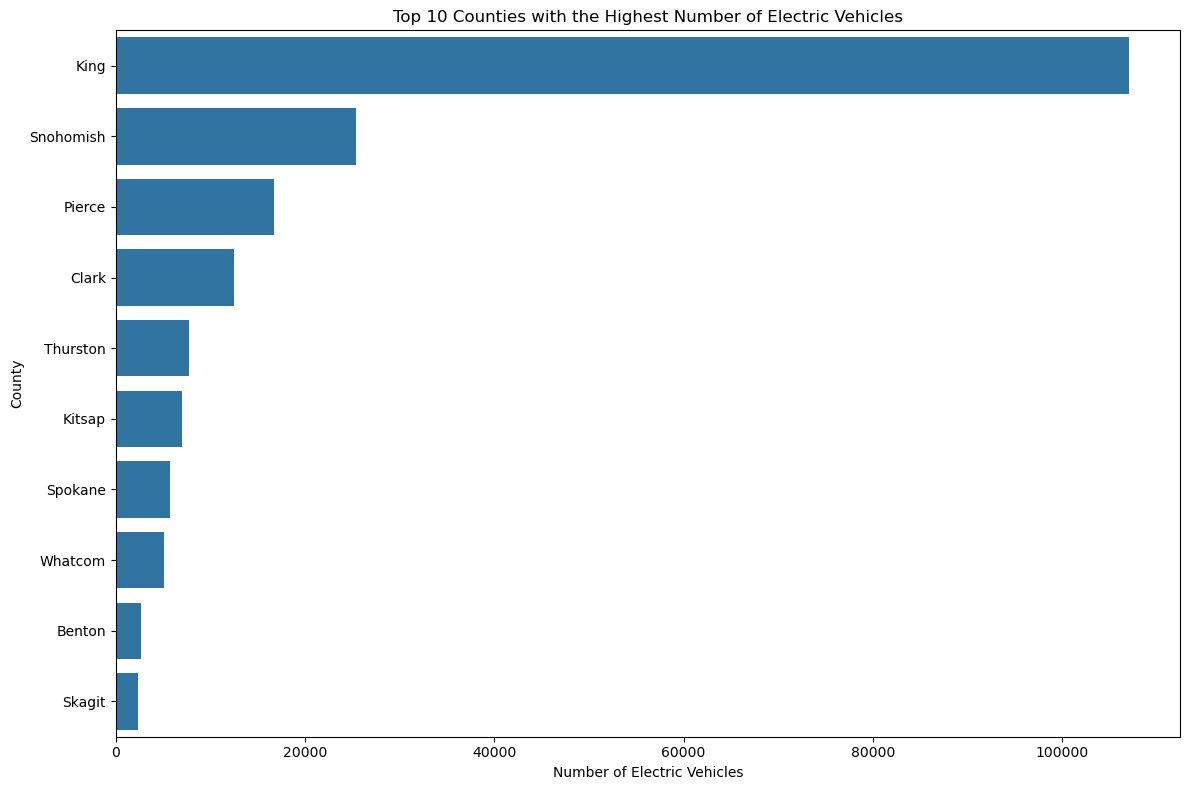

In [80]:
#visualization for Hypothesis 1. Visualizing the top 10 counties with the most electric car vehicles 
#aggregating total electric vehicle counts by county
county_vehicle_counts = (
    cleaned_data.groupby('County')
    .size()
    .reset_index(name='Total Vehicles')
    .sort_values(by='Total Vehicles', ascending=False)
    .head(10)
)

#bar plot for the top 10 counties with the highest number of electric vehicles
plt.figure(figsize=(12, 8))
sns.barplot(
    data=county_vehicle_counts,
    x='Total Vehicles',
    y='County'
)
plt.title('Top 10 Counties with the Highest Number of Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.tight_layout()
plt.show()

We can see that King, Snohomish, and Pierce are the top three counties in the state with electric vehicles. Which kind of vehicles are most popular in these three counties?

In [81]:
#filter the data for King, Snohomish, and Pierce counties
top_three_counties = ['King', 'Snohomish', 'Pierce']
vehicles_in_top_counties = cleaned_data[cleaned_data['County'].isin(top_three_counties)]

#group by County, Make, and Model to find the most popular vehicles
top_vehicles_by_county = (
    vehicles_in_top_counties.groupby(['County', 'Make', 'Model'])
    .size()
    .reset_index(name='Count')
    .sort_values(by=['County', 'Count'], ascending=[True, False])
)

#extract the top vehicle for each of the three counties
most_popular_vehicles = top_vehicles_by_county.groupby('County').first().reset_index()

print("Most Popular Vehicles in King, Snohomish, and Pierce Counties")
print(most_popular_vehicles)


Most Popular Vehicles in King, Snohomish, and Pierce Counties
      County   Make    Model  Count
0       King  TESLA  MODEL Y  24353
1     Pierce  TESLA  MODEL Y   3088
2  Snohomish  TESLA  MODEL Y   6915


The Tesla Model Y was the most popular vehicle in all three counties 

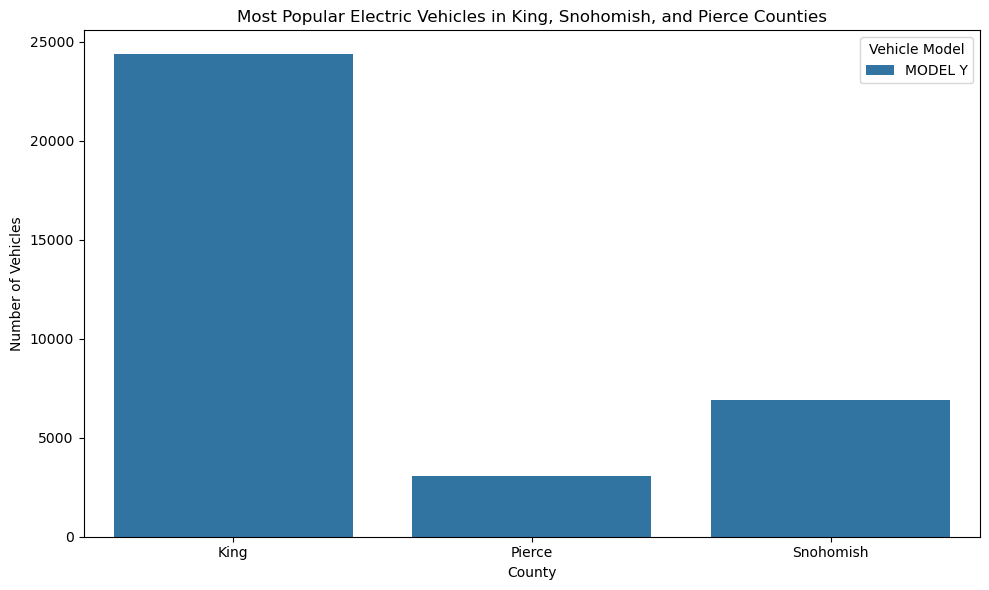

In [82]:
#visualization for the most popular vehicles in King, Snohomish, and Pierce counties
plt.figure(figsize=(10, 6))
sns.barplot(
    data=most_popular_vehicles,
    x='County',
    y='Count',
    hue='Model'
)
plt.title('Most Popular Electric Vehicles in King, Snohomish, and Pierce Counties')
plt.xlabel('County')
plt.ylabel('Number of Vehicles')
plt.legend(title='Vehicle Model')
plt.tight_layout()
plt.show()


Hypotheses 2: Is there a correlation between the average electric car ranges and their respective legislative districts or postal codes?


In [83]:
#group data by Legislative district and Postal Code, and calculate the average electric range
average_range_by_legislative_district = (
    cleaned_data.groupby('Legislative District')['Electric Range']
    .mean()
    .reset_index(name='Average Electric Range')
)

average_range_by_postal_code = (
    cleaned_data.groupby('Postal Code')['Electric Range']
    .mean()
    .reset_index(name='Average Electric Range')
)

#calculate correlation coefficients
legislative_correlation = average_range_by_legislative_district.corr().iloc[0, 1]
postal_code_correlation = average_range_by_postal_code.corr().iloc[0, 1]


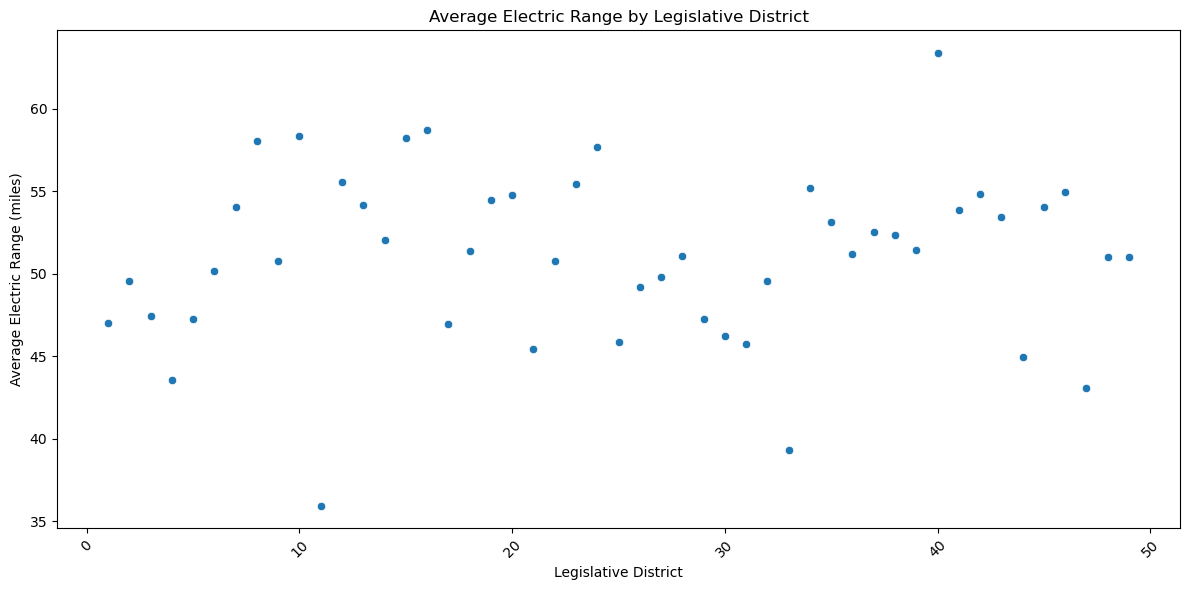

In [84]:
#visualization: Average Electric Range by Legislative District, scatter plot 
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=average_range_by_legislative_district.sort_values(by='Average Electric Range', ascending=False),
    x='Legislative District',
    y='Average Electric Range'
)
plt.title('Average Electric Range by Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Average Electric Range (miles)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

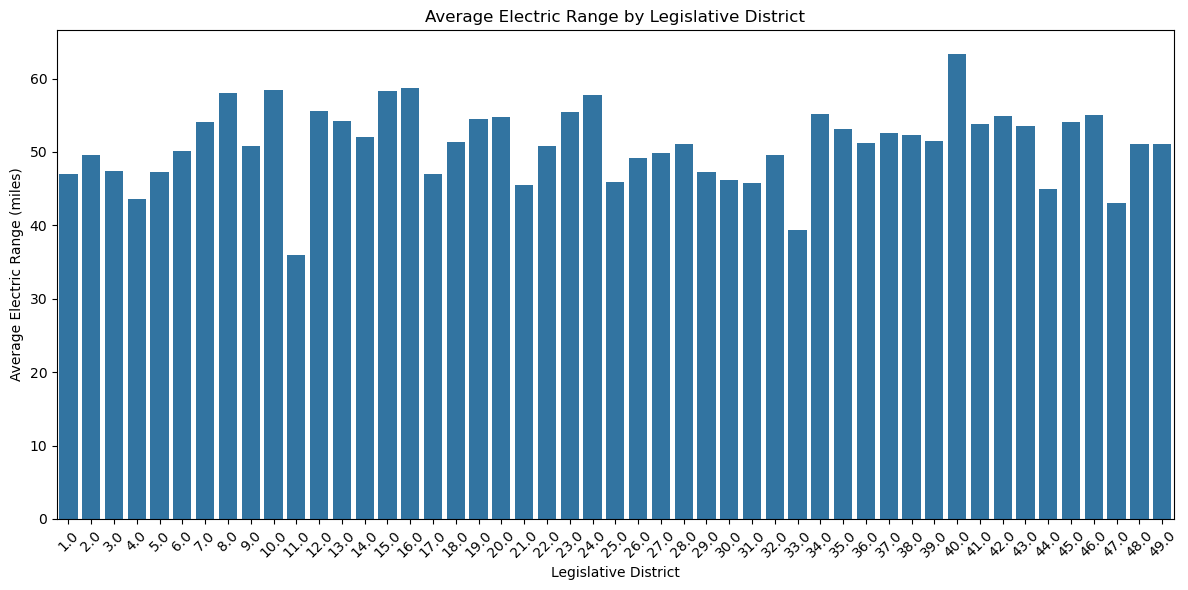

In [85]:
#visualization: Average Electric Range by Legislative District, bar plot 
plt.figure(figsize=(12, 6))
sns.barplot(
    data=average_range_by_legislative_district.sort_values(by='Average Electric Range', ascending=False),
    x='Legislative District',
    y='Average Electric Range'
)
plt.title('Average Electric Range by Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Average Electric Range (miles)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

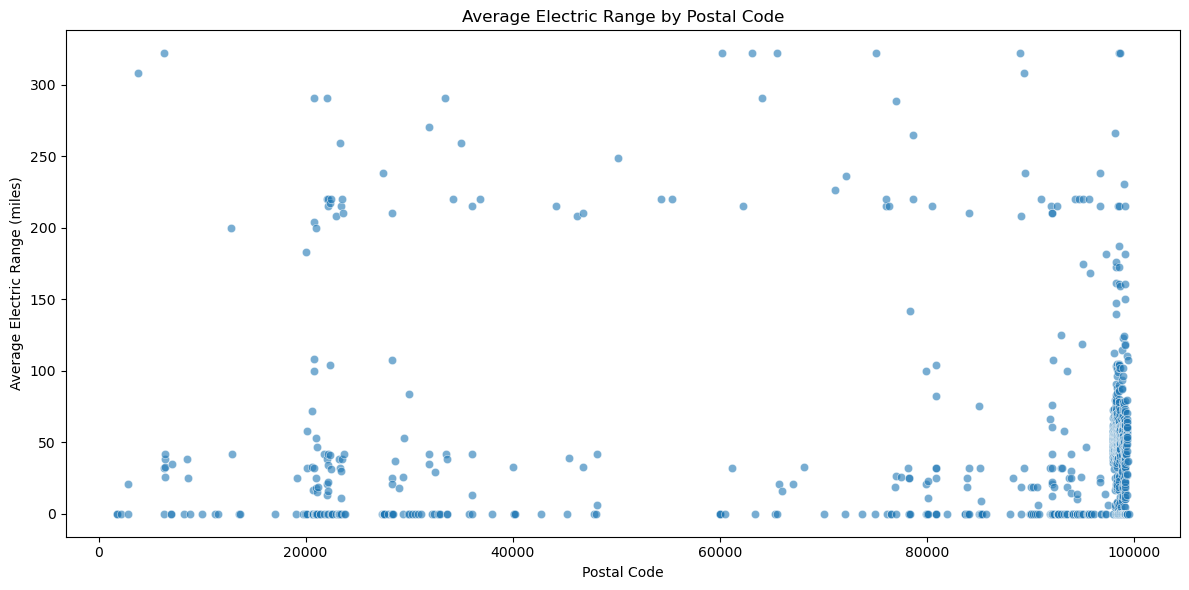

In [86]:
#visualization: Average Electric Range by Postal Code, scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=average_range_by_postal_code,
    x='Postal Code',
    y='Average Electric Range',
    alpha=0.6
)
plt.title('Average Electric Range by Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Average Electric Range (miles)')
plt.tight_layout()
plt.show()

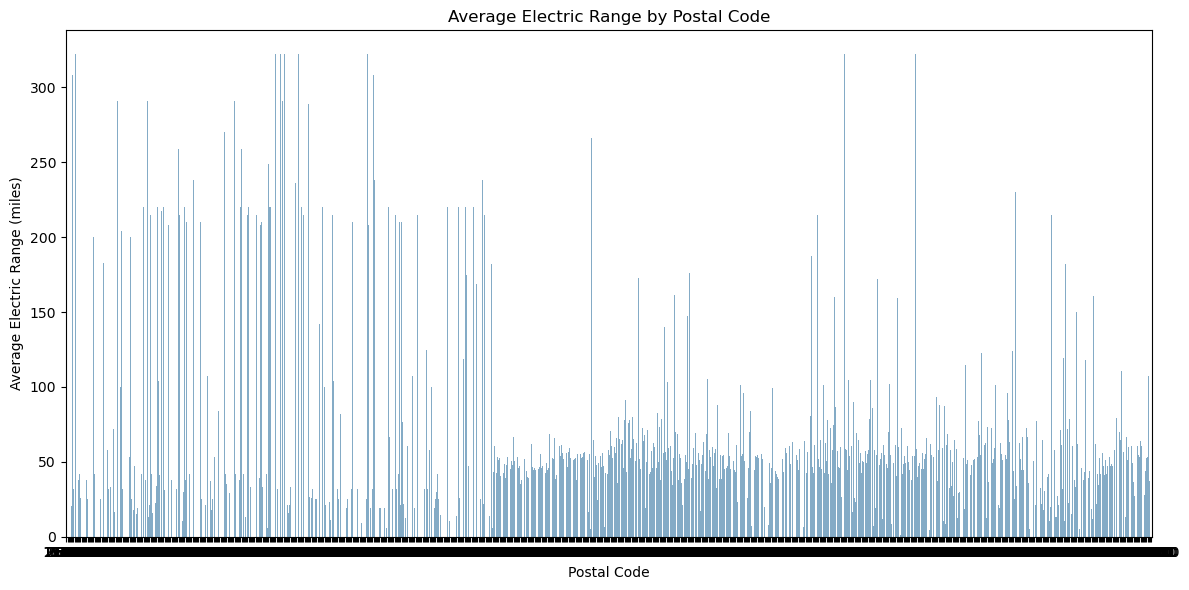

In [87]:
#visualization: Average Electric Range by Postal Code, bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=average_range_by_postal_code,
    x='Postal Code',
    y='Average Electric Range',
    alpha=0.6
)
plt.title('Average Electric Range by Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Average Electric Range (miles)')
plt.tight_layout()
plt.show()

In [102]:
#display correlation results
print("Correlation Between Electric Range and Legislative Districts: " + str(legislative_correlation))
print("Correlation Between Electric Range and Postal Codes: " + str(postal_code_correlation))

Correlation Between Electric Range and Legislative Districts: 0.07063320940439788
Correlation Between Electric Range and Postal Codes: -0.01699605656093876


A correlation of .07 indicates a very weak positive correlation. The electric range of cars present in a certain location is almost independent of the legislative districts. Any observed relationship is minimal and not practically significant.

A correlation of -.017 indicates a very weak negative correlation, essentially close to zero. This means that there is no meaningful relationship between postal codes and electric car ranges. The variation in ranges across postal codes is random and not systematically related.

So this means, geographical attributes such as district or postal code do not appear to influence or have a relationship with electric vehicle range in Washington state.

Hypothesis 3: have electric cars just recently entered the state or have been there when electric cars first came out, what does the adoption look like

In [90]:
#analyze the adoption of electric cars over time using Model Year
adoption_trend = (
    cleaned_data.groupby('Model Year')
    .size()
    .reset_index(name='Vehicle Count')
    .sort_values(by='Model Year')
)

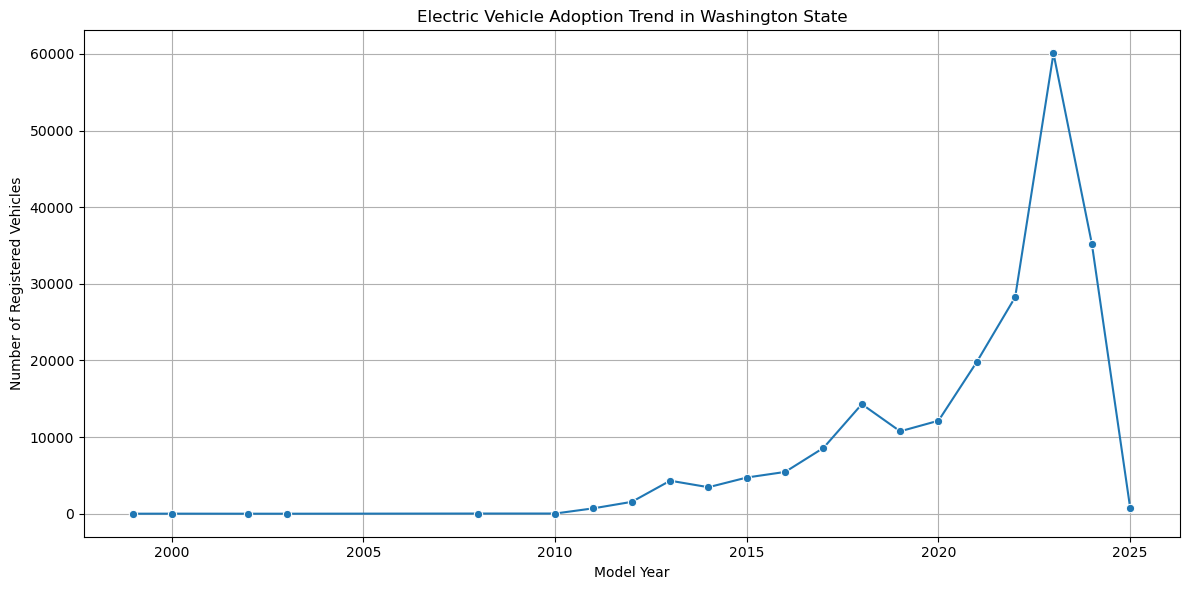

In [93]:
#visualization: Electric vehicle adoption trend over the years based on dataset 
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=adoption_trend,
    x='Model Year',
    y='Vehicle Count',
    marker='o'
)
plt.title('Electric Vehicle Adoption Trend in Washington State')
plt.xlabel('Model Year')
plt.ylabel('Number of Registered Vehicles')
plt.grid(True)
plt.tight_layout()
plt.show()


In [94]:
#displaying the first few and last few years to observe trends
adoption_trend.head(), adoption_trend.tail()

(   Model Year  Vehicle Count
 0        1999              2
 1        2000              7
 2        2002              2
 3        2003              1
 4        2008             22,
     Model Year  Vehicle Count
 16        2021          19812
 17        2022          28256
 18        2023          60070
 19        2024          35237
 20        2025            760)

Significant Growth (2010-2020): Around 2011, we see a noticeable increase in adoption occurred, driven by improvements in technology, incentives, and growing awareness of electric vehicles 

Recent Surge (2021-2023): The adoption rate sharply grew in recent years, with 2023 showing the highest number of registrations, suggesting widespread acceptance of electric vehicles.

What could have contributed to this surge? 
Let's explore the top models and makes during this time 

In [95]:
#filter data for the years 2019 to 2023
recent_years = [2019, 2020, 2021, 2022, 2023]
recent_data = cleaned_data[cleaned_data['Model Year'].isin(recent_years)]

#analyze the most popular makes and models during this period
popular_makes_models = (
    recent_data.groupby(['Make', 'Model'])
    .size()
    .reset_index(name='Vehicle Count')
    .sort_values(by='Vehicle Count', ascending=False)
    .head(10)
)

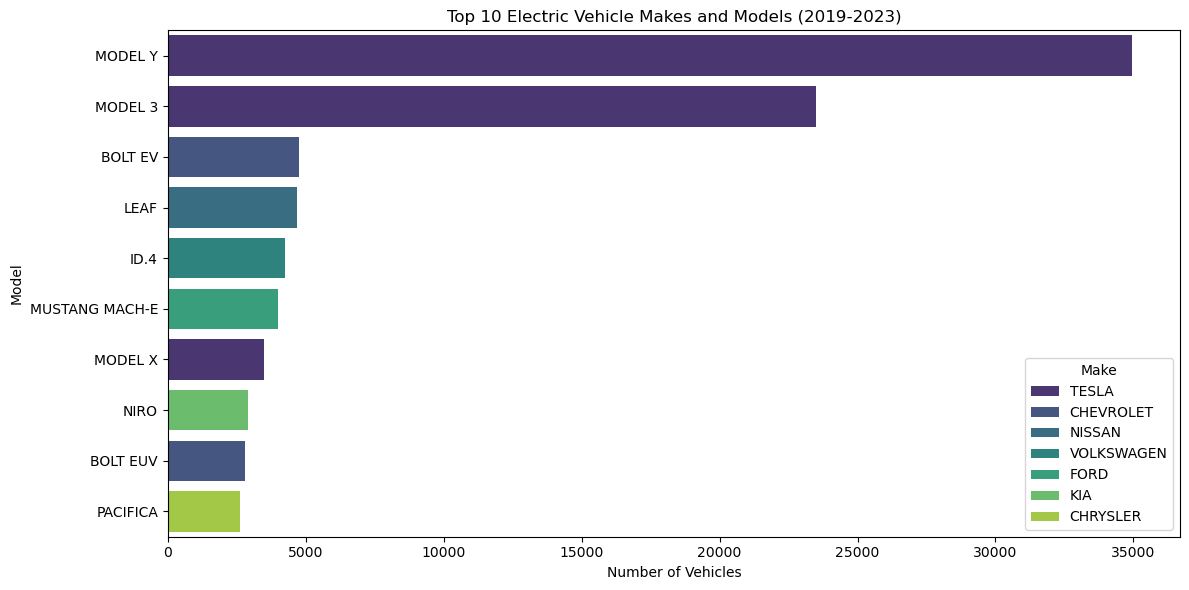

In [101]:
#visualization: Top 10 Makes and Models in Recent Years
plt.figure(figsize=(12, 6))
sns.barplot(
    data=popular_makes_models,
    x='Vehicle Count',
    y='Model',
    hue='Make',
    dodge=False,
    palette='viridis'
)
plt.title('Top 10 Electric Vehicle Makes and Models (2019-2023)')
plt.xlabel('Number of Vehicles')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

In [100]:
print("Top 10 Electric Vehicle Makes and Models (2021-2023): ")
print(popular_makes_models)


Top 10 Electric Vehicle Makes and Models (2021-2023): 
          Make           Model  Vehicle Count
88       TESLA         MODEL Y          34942
85       TESLA         MODEL 3          23508
25   CHEVROLET         BOLT EV           4770
74      NISSAN            LEAF           4675
94  VOLKSWAGEN            ID.4           4253
33        FORD  MUSTANG MACH-E           4012
87       TESLA         MODEL X           3475
51         KIA            NIRO           2908
24   CHEVROLET        BOLT EUV           2799
27    CHRYSLER        PACIFICA           2610


Tesla's Model Y and Model 3 are the top vehicles, followed by Chevy Bolt and Nissan Leaf 

Do prices or mileage ranges have to do with vehicle popularity? 

In [103]:
#filter data for vehicles from 2010 onward to focus on growth period
growth_period_data = cleaned_data[cleaned_data['Model Year'] >= 2010]

#calculate average electric range and MSRP by model year
range_price_trends = (
    growth_period_data.groupby('Model Year')
    .agg(Average_Range=('Electric Range', 'mean'), Average_MSRP=('Base MSRP', 'mean'))
    .reset_index()
)

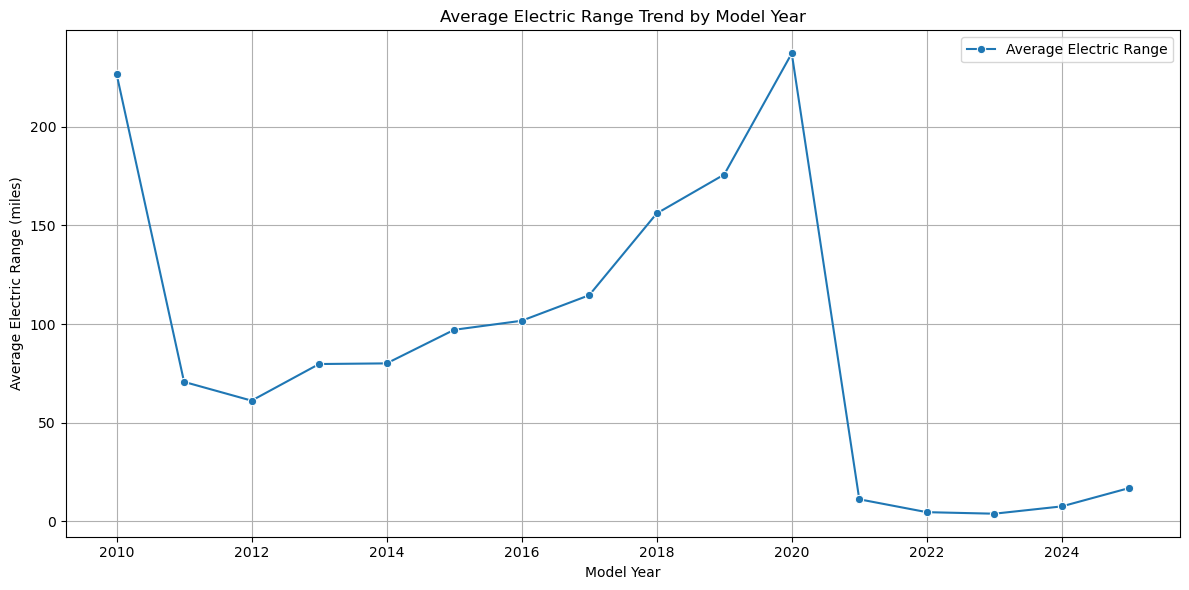

In [104]:
#visualization 1: Average Electric Range by Model Year
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=range_price_trends,
    x='Model Year',
    y='Average_Range',
    marker='o',
    label='Average Electric Range'
)
plt.title('Average Electric Range Trend by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.tight_layout()
plt.show()

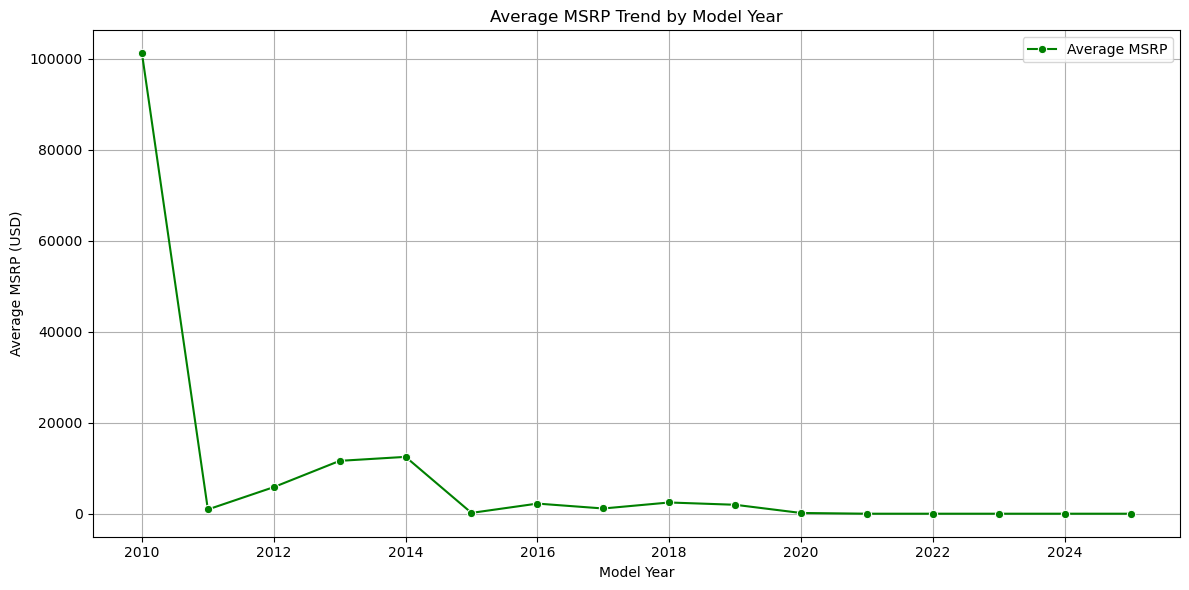

In [105]:
#visualization 2: Average MSRP by Model Year
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=range_price_trends,
    x='Model Year',
    y='Average_MSRP',
    marker='o',
    color='green',
    label='Average MSRP'
)
plt.title('Average MSRP Trend by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average MSRP (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [106]:
#display the trends as a dataframe
print("Electric Range and MSRP Trends by Model Year: ")
print(range_price_trends)


Electric Range and MSRP Trends by Model Year: 
    Model Year  Average_Range   Average_MSRP
0         2010     226.875000  101205.625000
1         2011      70.674716     928.977273
2         2012      61.162686    5844.480310
3         2013      79.723706   11620.246111
4         2014      80.050043   12495.863465
5         2015      97.073698     178.949598
6         2016     101.660492    2222.844828
7         2017     114.599953    1146.959483
8         2018     156.058066    2465.668112
9         2019     175.787129    1962.586720
10        2020     237.212196     160.395550
11        2021      11.151777       0.000000
12        2022       4.627548       0.000000
13        2023       3.849492       0.000000
14        2024       7.561143       0.000000
15        2025      16.876316       0.000000


There has been a noticeable increase in the average electric range over time, especially after 2015 as technology improved and longer-range models were introduced.

The average MSRP showed a decreasing trend for some years, indicating increased affordability as more mid-range and budget-friendly electric vehicles entered the market.
